## Part I: Building a Basic Neural Network

### Step 1: Loading the Dataset and Main Statistics

#### Importing required libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch

#### Reading Dataset

In [39]:
df = pd.read_csv('datasets/dataset.csv')
print(df.head())

  f1   f2  f3  f4   f5    f6     f7  target
0  6  148  72  35    0  33.6  0.627       1
1  1   85  66  29    0  26.6  0.351       0
2  8  183  64   0    0  23.3  0.672       1
3  1   89  66  23   94  28.1  0.167       0
4  0  137  40  35  168  43.1  2.288       1


#### Analyzing the dataset

In [40]:
# Basic statistics
print(df.describe(include = 'all'))

print("null values: ",df.isnull().sum())

print(df.dtypes)

         f1   f2          f3   f4   f5   f6     f7      target
count   766  766  766.000000  766  766  766    766  766.000000
unique   18  137         NaN   52  186  249    517         NaN
top       1   99         NaN    0    0   32  0.254         NaN
freq    134   17         NaN  226  372   13      6         NaN
mean    NaN  NaN   69.118799  NaN  NaN  NaN    NaN    0.349869
std     NaN  NaN   19.376901  NaN  NaN  NaN    NaN    0.477240
min     NaN  NaN    0.000000  NaN  NaN  NaN    NaN    0.000000
25%     NaN  NaN   62.500000  NaN  NaN  NaN    NaN    0.000000
50%     NaN  NaN   72.000000  NaN  NaN  NaN    NaN    0.000000
75%     NaN  NaN   80.000000  NaN  NaN  NaN    NaN    1.000000
max     NaN  NaN  122.000000  NaN  NaN  NaN    NaN    1.000000
null values:  f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64
f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
ta

In [41]:
for column in df.columns[:-1]:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    median = df[column].median()
    print(column, (df[column] == 0).sum())
    # print(df.isnull().sum())
    df[column] = df[column].replace(0, median)
    df[column] = df[column].fillna(median)
    
print("=========")
for column in df.columns[:-1]:
    print(column, (df[column] == 0).sum())
print(df.head(20))

f1 111
f2 5
f3 35
f4 226
f5 372
f6 11
f7 0
f1 0
f2 0
f3 0
f4 0
f5 0
f6 0
f7 0
      f1     f2  f3    f4     f5    f6     f7  target
0    6.0  148.0  72  35.0   36.0  33.6  0.627       1
1    1.0   85.0  66  29.0   36.0  26.6  0.351       0
2    8.0  183.0  64  23.0   36.0  23.3  0.672       1
3    1.0   89.0  66  23.0   94.0  28.1  0.167       0
4    3.0  137.0  40  35.0  168.0  43.1  2.288       1
5    5.0  116.0  74  23.0   36.0  25.6  0.201       0
6    3.0   78.0  50  32.0   88.0  31.0  0.248       1
7   10.0  115.0  72  23.0   36.0  35.3  0.134       0
8    2.0  197.0  70  45.0  543.0  30.5  0.158       1
9    8.0  125.0  96  23.0   36.0  32.0  0.232       1
10   4.0  110.0  92  23.0   36.0  37.6  0.191       0
11  10.0  168.0  74  23.0   36.0  38.0  0.537       1
12  10.0  139.0  80  23.0   36.0  27.1  1.441       0
13   1.0  189.0  60  23.0  846.0  30.1  0.398       1
14   5.0  166.0  72  19.0  175.0  25.8  0.587       1
15   7.0  100.0  72  23.0   36.0  30.0  0.484       1
16  

#### Handling invalid character entries

In [42]:
# # Since all the columns have numerical values and we can see some outliers with characters, we will remove these characters with mode of each column

# # f1
# print("unique f1 values  ",df['f1'].unique())
# df['f1'] = pd.to_numeric(df['f1'], errors='coerce')
# mode_value_f1 = df['f1'].mode()[0]
# df['f1'] = df['f1'].fillna(mode_value_f1)
# print("unique f1 values after removing invalids ",df['f1'].unique())


# # f2
# df['f2'] = pd.to_numeric(df['f2'], errors='coerce')
# mode_value_f2 = df['f2'].mode()[0]
# df['f2'] = df['f2'].fillna(mode_value_f2)

# # f3
# # Already integer column

# # f4
# df['f4'] = pd.to_numeric(df['f4'], errors='coerce')
# mode_value_f4 = df['f4'].mode()[0]
# df['f4'] = df['f4'].fillna(mode_value_f4)

# # f5
# df['f5'] = pd.to_numeric(df['f5'], errors='coerce')
# mode_value_f5 = df['f5'].mode()[0]
# df['f5'] = df['f5'].fillna(mode_value_f5)

# # f6
# df['f6'] = pd.to_numeric(df['f6'], errors='coerce')
# mode_value_f6 = df['f6'].mode()[0]
# df['f6'] = df['f6'].fillna(mode_value_f6)

# # f7
# df['f7'] = pd.to_numeric(df['f7'], errors='coerce')
# mode_value_f7 = df['f7'].mode()[0]
# df['f7'] = df['f7'].fillna(mode_value_f7)

#### Visualization

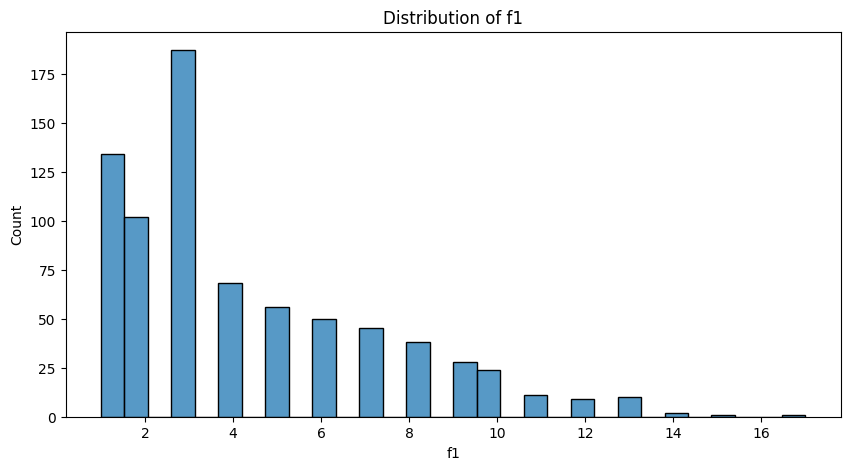

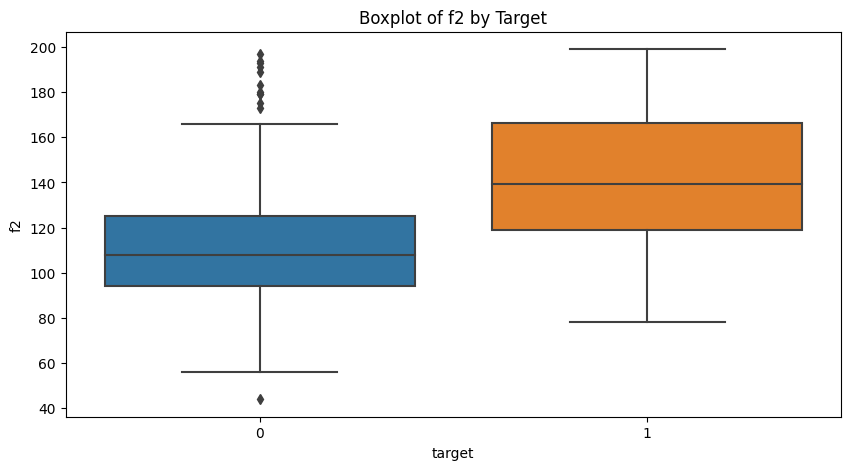

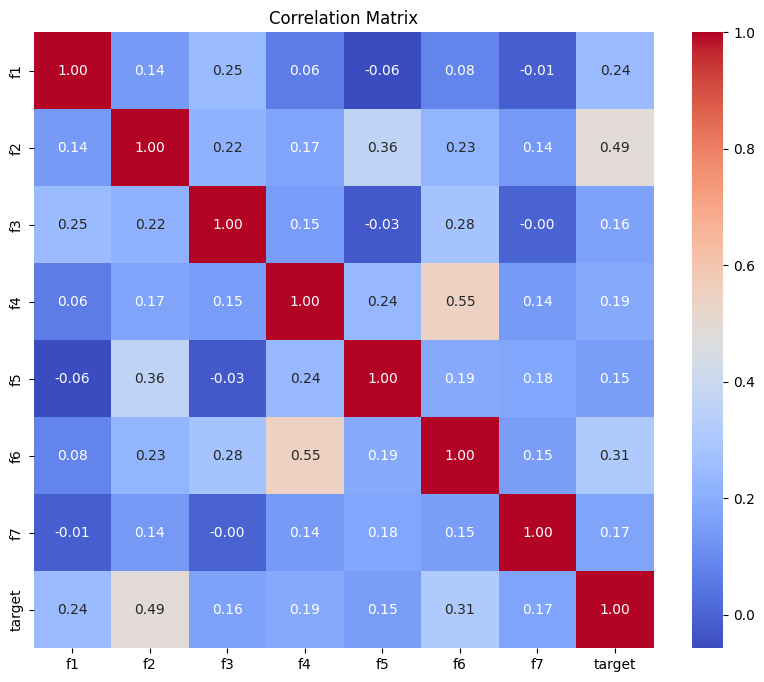

In [43]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['f1'], bins=30)
plt.title('Distribution of f1')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='f2', data=df)
plt.title('Boxplot of f2 by Target')
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Step 2: Preprocessing and Splitting the Dataset

#### Preprocessing

In [44]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']  
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,0.568394,0.867126,-0.033789,0.830457,-0.591830,0.166082,0.468094,1
1,-1.087081,-1.207528,-0.529942,0.180682,-0.591830,-0.851671,-0.365415,0
2,1.230584,2.019711,-0.695327,-0.469094,-0.591830,-1.331469,0.603992,1
3,-1.087081,-1.075804,-0.529942,-0.469094,-0.033835,-0.633581,-0.921087,0
4,-0.424891,0.504885,-2.679939,0.830457,0.678089,1.547319,5.484245,1


#### No categorical columns in the dataset hence conversion to numerical not required

#### Splitting the dataset

In [45]:
# Defining features and target
X = df.drop('target', axis=1)
y = df['target']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

print(X_train.count())
print(X_val.count())
print(X_test.count())

f1    429
f2    429
f3    429
f4    429
f5    429
f6    429
f7    429
dtype: int64
f1    183
f2    183
f3    183
f4    183
f5    183
f6    183
f7    183
dtype: int64
f1    154
f2    154
f3    154
f4    154
f5    154
f6    154
f7    154
dtype: int64


#### Converting the dataframe to Pytorch tensor

In [46]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [47]:
print(df.corr())

              f1        f2        f3        f4        f5        f6        f7  \
f1      1.000000  0.143963  0.246601  0.061604 -0.057308  0.080107 -0.013963   
f2      0.143963  1.000000  0.217537  0.172058  0.363061  0.227234  0.138105   
f3      0.246601  0.217537  1.000000  0.147846 -0.026684  0.280435 -0.001912   
f4      0.061604  0.172058  0.147846  1.000000  0.236986  0.546832  0.143157   
f5     -0.057308  0.363061 -0.026684  0.236986  1.000000  0.188701  0.176712   
f6      0.080107  0.227234  0.280435  0.546832  0.188701  1.000000  0.153072   
f7     -0.013963  0.138105 -0.001912  0.143157  0.176712  0.153072  1.000000   
target  0.244771  0.489545  0.164668  0.189462  0.150722  0.311832  0.173910   

          target  
f1      0.244771  
f2      0.489545  
f3      0.164668  
f4      0.189462  
f5      0.150722  
f6      0.311832  
f7      0.173910  
target  1.000000  


## Step 3: Defining the Neural Network